# How to Train YOLOv7 on a Custom Dataset

This tutorial is based on the [YOLOv7 repository](https://github.com/WongKinYiu/yolov7) by WongKinYiu. This notebook shows training on **your own custom objects**. Many thanks to WongKinYiu and AlexeyAB for putting this repository together.


### **Accompanying Blog Post**

We recommend that you follow along in this notebook while reading the blog post on [how to train YOLOv7](https://blog.roboflow.com/yolov7-custom-dataset-training-tutorial/), concurrently.

### **Steps Covered in this Tutorial**

To train our detector we take the following steps:

* Install YOLOv7 dependencies
* Load custom dataset from Roboflow in YOLOv7 format
* Run YOLOv7 training
* Evaluate YOLOv7 performance
* Run YOLOv7 inference on test images
* OPTIONAL: Deployment
* OPTIONAL: Active Learning


### Preparing a Custom Dataset

In this tutorial, we will utilize an open source computer vision dataset from one of the 90,000+ available on [Roboflow Universe](https://universe.roboflow.com).

If you already have your own images (and, optionally, annotations), you can convert your dataset using [Roboflow](https://roboflow.com), a set of tools developers use to build better computer vision models quickly and accurately. 100k+ developers use roboflow for (automatic) annotation, converting dataset formats (like to YOLOv7), training, deploying, and improving their datasets/models.

Follow [the getting started guide here](https://docs.roboflow.com/quick-start) to create and prepare your own custom dataset.

#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [1]:
# Download YOLOv7 repository and install requirements
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
!pip install -r requirements.txt

Cloning into 'yolov7'...
remote: Enumerating objects: 963, done.
remote: Total 963 (delta 0), reused 0 (delta 0), pack-reused 963
Receiving objects: 100% (963/963), 68.16 MiB | 15.91 MiB/s, done.
Resolving deltas: 100% (503/503), done.
/content/yolov7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 41.1 MB/s 


# Download Correctly Formatted Custom Data

Next, we'll download our dataset in the right format. Use the `YOLOv7 PyTorch` export. Note that this model requires YOLO TXT annotations, a custom YAML file, and organized directories. The roboflow export writes this for us and saves it in the correct spot.


In [2]:
# REPLACE with your custom code snippet generated above

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6IjEQGHq1yObVoDSlOml")
project = rf.workspace("augmented-startups").project("weeds-nxe1w")
dataset = project.version(3).download("yolov7")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 145 kB 49.4 MB/s 
     |████████████████████████████████| 178 kB 69.7 MB/s 
     |████████████████████████████████| 1.1 MB 60.8 MB/s 
     |████████████████████████████████| 67 kB 6.1 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 138 kB 73.6 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Created wheel for roboflow: filename=roboflow-0.2.15-py3-none-any.whl size=24936 sha256=9b7f05a9b4cd2c4c816f3179460bcbec16cde37434f7b93dfed26ee12bd60de8
  Stored in directory: /root/.cache/pip/wheels/13/e0/a3/fe183fffc3972cb9264e800763d4bbfff80d5309137c410217
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=fcdf3eb3c6917b4b4b84952ff6d2f7686bacb6acd27a9854a33082ae340e4524
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Weeds-3 in yolov7pytorch:: 100%|██████████| 8418/8418 [00:03<00:00, 2410.93it/s]


# Begin Custom Training

We're ready to start custom training.

NOTE: We will only modify one of the YOLOv7 training defaults in our example: `epochs`. We will adjust from 300 to 100 epochs in our example for speed. If you'd like to change other settings, see details in [our accompanying blog post](https://blog.roboflow.com/yolov7-custom-dataset-training-tutorial/).

In [3]:
# download COCO starting checkpoint
%cd /content/yolov7
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7_tiny.pt

/content/yolov7
--2022-09-25 19:14:46--  https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7_tiny.pt
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-09-25 19:14:46 ERROR 404: Not Found.



In [4]:
# run this cell to begin training
%cd /content/yolov7
!python train.py --batch 16 --cfg cfg/training/yolov7-tiny.yaml --epochs 100 --data {dataset.location}/data.yaml --weights 'yolov7-tiny.pt' --cache-images --device 0

/content/yolov7
YOLOR 🚀 v0.1-112-g55b90e1 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=True, cfg='cfg/training/yolov7-tiny.yaml', data='/content/yolov7/Weeds-3/data.yaml', device='0', entity=None, epochs=100, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights='yolov7-tiny.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_e

# Evaluation

We can evaluate the performance of our custom training using the provided evalution script.

Note we can adjust the below custom arguments. For details, see [the arguments accepted by detect.py](https://github.com/WongKinYiu/yolov7/blob/main/detect.py#L154).

In [5]:
# Run evaluation
!python detect.py --weights runs/train/exp/weights/best.pt --conf 0.1 --source {dataset.location}/test/images


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.1, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/yolov7/Weeds-3/test/images', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])
YOLOR 🚀 v0.1-112-g55b90e1 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
IDetect.fuse
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 208 layers, 6007596 parameters, 0 gradients, 13.0 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

4 Weedss, Done. (7.5ms) Inference, (1.4ms) NMS
 The image with the result 

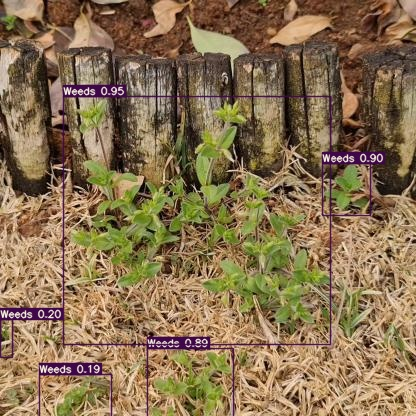

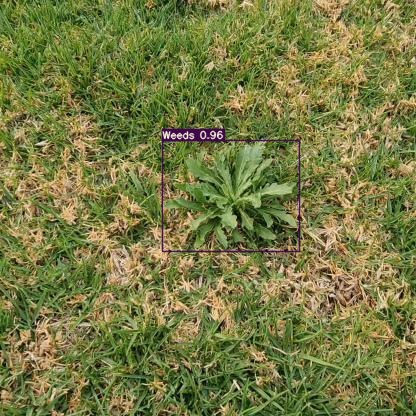

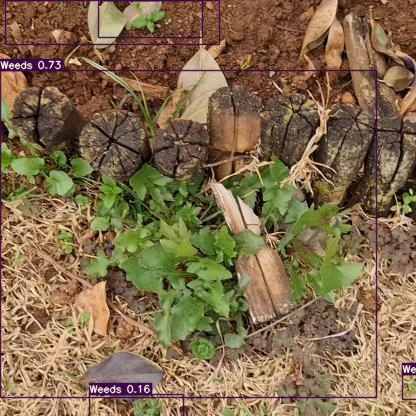

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
limit = 10000 # max images to print
for imageName in glob.glob('/content/yolov7/runs/detect/exp/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
    i = i + 1
    

# Reparameterize for Inference

https://github.com/WongKinYiu/yolov7/blob/main/tools/reparameterization.ipynb

# OPTIONAL: Deployment

To deploy, you'll need to export your weights and save them to use later.

In [ ]:
# optional, zip to download weights and results locally

!zip -r export.zip runs/detect
!zip -r export.zip runs/train/exp/weights/best.pt
!zip export.zip runs/train/exp/*

In [ ]:
import torch
# Create dummy input for the model. It will be used to run the model inside export function.
dummy_input = torch.randn(1, 3, 224, 224)
# Call the export function
torch.onnx.export("runs/train/exp/weights/best.pt" , (dummy_input, ), '/content/model.onnx')

In [ ]:
import os
from urllib.parse import urlparse
## install tools. Open Vino takes some time to download - it's ~400MB
!sudo apt-get install -y pciutils cpio
!sudo apt autoremove
## downnload installation files
url = "https://registrationcenter-download.intel.com/akdlm/irc_nas/17662/l_openvino_toolkit_p_2021.3.394.t
!wget {url}
## Get the name of the tgz
parsed = urlparse(url)
openvino_tgz = os.path.basename(parsed.path)
openvino_folder = os.path.splitext(openvino_tgz)[0]
## Extract & install openvino
!tar xf {openvino_tgz}
%cd {openvino_folder}
!./install_openvino_dependencies.sh && \
 sed -i 's/decline/accept/g' silent.cfg && \
 ./install.sh --silent silent.cfg

In [ ]:
#%cd "/content/models/research/fine_tuned_model/"
!source /opt/intel/openvino_2021/bin/setupvars.sh && \
 python /opt/intel/openvino_2021/deployment_tools/model_optimizer/mo.py --input_model /content/model.onnx --output_dir /content --data_type FP16

In [ ]:
xmlfile = "/content/age_net.xml"
binfile = "/content/age_net.bin"
!python -m pip install boto3==1.17.39
!python -m pip install blobconverter==1.2.9
import blobconverter
blob_path = blobconverter.from_openvino(
 xml=xmlfile,
 bin=binfile,
 data_type="FP16",
 shaves=6,
)
from google.colab import files
#·I·use·the·same·--output_dir·as·above·for·the·IR·conversion
files.download(blob_path)

# OPTIONAL: Active Learning Example

Once our first training run is complete, we should use our model to help identify which images are most problematic in order to investigate, annotate, and improve our dataset (and, therefore, model).

To do that, we can execute code that automatically uploads images back to our hosted dataset if the image is a specific class or below a given confidence threshold.


In [ ]:
# # setup access to your workspace
# rf = Roboflow(api_key="YOUR_API_KEY")                               # used above to load data
# inference_project =  rf.workspace().project("YOUR_PROJECT_NAME")    # used above to load data
# model = inference_project.version(1).model

# upload_project = rf.workspace().project("YOUR_PROJECT_NAME")

# print("inference reference point: ", inference_project)
# print("upload destination: ", upload_project)

In [ ]:
# # example upload: if prediction is below a given confidence threshold, upload it 

# confidence_interval = [10,70]                                   # [lower_bound_percent, upper_bound_percent]

# for prediction in predictions:                                  # predictions list to loop through
#   if(prediction['confidence'] * 100 >= confidence_interval[0] and 
#           prediction['confidence'] * 100 <= confidence_interval[1]):
        
#           # upload on success!
#           print(' >> image uploaded!')
#           upload_project.upload(image, num_retry_uploads=3)     # upload image in question

# Next steps

Congratulations, you've trained a custom YOLOv7 model! Next, start thinking about deploying and [building an MLOps pipeline](https://docs.roboflow.com) so your model gets better the more data it sees in the wild.